In [10]:
print("=" * 80)
print("STEP 1: VERIFYING DATASET")
print("=" * 80)

import os

# List all available datasets
print("\nAvailable datasets in /kaggle/input/:")
datasets = os.listdir('/kaggle/input')
for dataset in datasets:
    print(f"  - {dataset}")

# Check your specific dataset
dataset_path = '/kaggle/input/alzheimer-mri-4-classes-dataset/Alzheimer_MRI_4_classes_dataset'
print(f"\nChecking dataset path: {dataset_path}")

if os.path.exists(dataset_path):
    print("✓ Dataset found successfully!")
    print(f"\nFolders in dataset:")
    folders = os.listdir(dataset_path)
    for folder in folders:
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):
            num_images = len(os.listdir(folder_path))
            print(f"  - {folder}: {num_images} images")
else:
    print("✗ Dataset not found!")
    print("Please check the dataset name and make sure it's added to your notebook.")
    print("\nIf the path is different, update the 'dataset_path' variable above.")


STEP 1: VERIFYING DATASET

Available datasets in /kaggle/input/:
  - alzheimer-mri-4-classes-dataset

Checking dataset path: /kaggle/input/alzheimer-mri-4-classes-dataset/Alzheimer_MRI_4_classes_dataset
✓ Dataset found successfully!

Folders in dataset:
  - ModerateDemented: 64 images
  - NonDemented: 3200 images
  - VeryMildDemented: 2240 images
  - MildDemented: 882 images


In [11]:
print("=" * 80)
print("STEP 2: IMPORTING LIBRARIES")
print("=" * 80)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.image as img
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from itertools import product
import warnings
warnings.filterwarnings('ignore')

print(f"\n✓ TensorFlow version: {tf.__version__}")
print(f"✓ GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")
if len(tf.config.list_physical_devices('GPU')) > 0:
    print(f"  GPU Device: {tf.config.list_physical_devices('GPU')}")
else:
    print("  ⚠ Warning: No GPU found. Training will be slower.")

print("\n✓ All libraries imported successfully!")
print("\n" + "=" * 80 + "\n")

STEP 2: IMPORTING LIBRARIES

✓ TensorFlow version: 2.18.0
✓ GPU Available: True
  GPU Device: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

✓ All libraries imported successfully!




In [12]:
print("=" * 80)
print("STEP 3: INSTALLING SPLIT-FOLDERS PACKAGE")
print("=" * 80)
print("\nThis package will split your dataset into train/validation/test sets...")

!pip install split-folders -q

import splitfolders

print("\n✓ split-folders installed and imported successfully!")
print("\n" + "=" * 80 + "\n")

STEP 3: INSTALLING SPLIT-FOLDERS PACKAGE

This package will split your dataset into train/validation/test sets...

✓ split-folders installed and imported successfully!




In [13]:
print("=" * 80)
print("STEP 4: SPLITTING DATASET")
print("=" * 80)
print("\nSplit ratio:")
print("  - Training:   80%")
print("  - Validation: 10%")
print("  - Testing:    10%")

# First, check what's in the dataset folder
dataset_path = '/kaggle/input/alzheimer-mri-4-classes-dataset/Alzheimer_MRI_4_classes_dataset'
print(f"\nChecking contents of: {dataset_path}")
contents = os.listdir(dataset_path)
print(f"Found items: {contents}")

# Filter to only valid class folders (those containing images)
valid_classes = []
for item in contents:
    item_path = os.path.join(dataset_path, item)
    if os.path.isdir(item_path):
        # Check if folder contains image files
        files = os.listdir(item_path)
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
        if len(image_files) > 0:
            valid_classes.append(item)
            print(f"  ✓ {item}: {len(image_files)} images")
        else:
            print(f"  ✗ {item}: Empty or no images (will be ignored)")

print("\nThis will take a few seconds...\n")

# Split the dataset
splitfolders.ratio(
    '/kaggle/input/alzheimer-mri-4-classes-dataset/Alzheimer_MRI_4_classes_dataset',  # Your dataset path (updated)
    output="output",                                   # Output folder
    seed=1345,                                        # Random seed for reproducibility
    ratio=(0.8, 0.1, 0.1)                            # Train, validation, test split
)

print("\n✓ Dataset split completed!")

# Verify the split and remove empty folders
print("\nVerifying split and cleaning up:")
for split in ['train', 'val', 'test']:
    split_path = f"./output/{split}"
    if os.path.exists(split_path):
        classes = os.listdir(split_path)
        print(f"  {split.upper()}:")
        for cls in classes:
            cls_path = os.path.join(split_path, cls)
            if os.path.isdir(cls_path):
                num_images = len(os.listdir(cls_path))
                if num_images == 0:
                    # Remove empty folder
                    os.rmdir(cls_path)
                    print(f"    ✗ {cls}: 0 images (removed)")
                else:
                    print(f"    ✓ {cls}: {num_images} images")

print("\n" + "=" * 80 + "\n")

STEP 4: SPLITTING DATASET

Split ratio:
  - Training:   80%
  - Validation: 10%
  - Testing:    10%

Checking contents of: /kaggle/input/alzheimer-mri-4-classes-dataset/Alzheimer_MRI_4_classes_dataset
Found items: ['ModerateDemented', 'NonDemented', 'VeryMildDemented', 'MildDemented']
  ✓ ModerateDemented: 64 images
  ✓ NonDemented: 3200 images
  ✓ VeryMildDemented: 2240 images
  ✓ MildDemented: 882 images

This will take a few seconds...



Copying files: 6386 files [00:06, 970.68 files/s] 


✓ Dataset split completed!

Verifying split and cleaning up:
  TRAIN:
    ✓ ModerateDemented: 51 images
    ✓ NonDemented: 2560 images
    ✓ VeryMildDemented: 1792 images
    ✗ Alzheimer_MRI_4_classes_dataset: 0 images (removed)
    ✓ MildDemented: 705 images
  VAL:
    ✓ ModerateDemented: 6 images
    ✓ NonDemented: 320 images
    ✓ VeryMildDemented: 224 images
    ✗ Alzheimer_MRI_4_classes_dataset: 0 images (removed)
    ✓ MildDemented: 88 images
  TEST:
    ✓ ModerateDemented: 7 images
    ✓ NonDemented: 320 images
    ✓ VeryMildDemented: 224 images
    ✗ Alzheimer_MRI_4_classes_dataset: 0 images (removed)
    ✓ MildDemented: 89 images




In [14]:
print("=" * 80)
print("STEP 5: DEFINING MODEL PARAMETERS")
print("=" * 80)

IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 64

print(f"\nImage dimensions: {IMG_HEIGHT} x {IMG_WIDTH} pixels")
print(f"Batch size: {BATCH_SIZE}")
print(f"Color channels: 3 (RGB)")
print(f"Total input shape: ({IMG_HEIGHT}, {IMG_WIDTH}, 3)")

print("\n" + "=" * 80 + "\n")

STEP 5: DEFINING MODEL PARAMETERS

Image dimensions: 128 x 128 pixels
Batch size: 64
Color channels: 3 (RGB)
Total input shape: (128, 128, 3)




In [15]:
print("=" * 80)
print("STEP 6: LOADING DATASETS INTO TENSORFLOW")
print("=" * 80)

print("\nLoading training dataset...")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./output/train",
    seed=123,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

print("\nLoading validation dataset...")
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./output/val",
    seed=123,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

print("\nLoading test dataset...")
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./output/test",
    seed=123,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Get class names
class_names = train_ds.class_names
print(f"\n✓ All datasets loaded successfully!")
print(f"\nClasses detected: {class_names}")
print(f"Number of classes: {len(class_names)}")

print("\n" + "=" * 80 + "\n")

STEP 6: LOADING DATASETS INTO TENSORFLOW

Loading training dataset...
Found 5108 files belonging to 4 classes.


I0000 00:00:1767432362.675771      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1767432362.676406      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5



Loading validation dataset...
Found 638 files belonging to 4 classes.

Loading test dataset...
Found 640 files belonging to 4 classes.

✓ All datasets loaded successfully!

Classes detected: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
Number of classes: 4




STEP 7: VISUALIZING SAMPLE IMAGES

Displaying 9 sample images from training set...



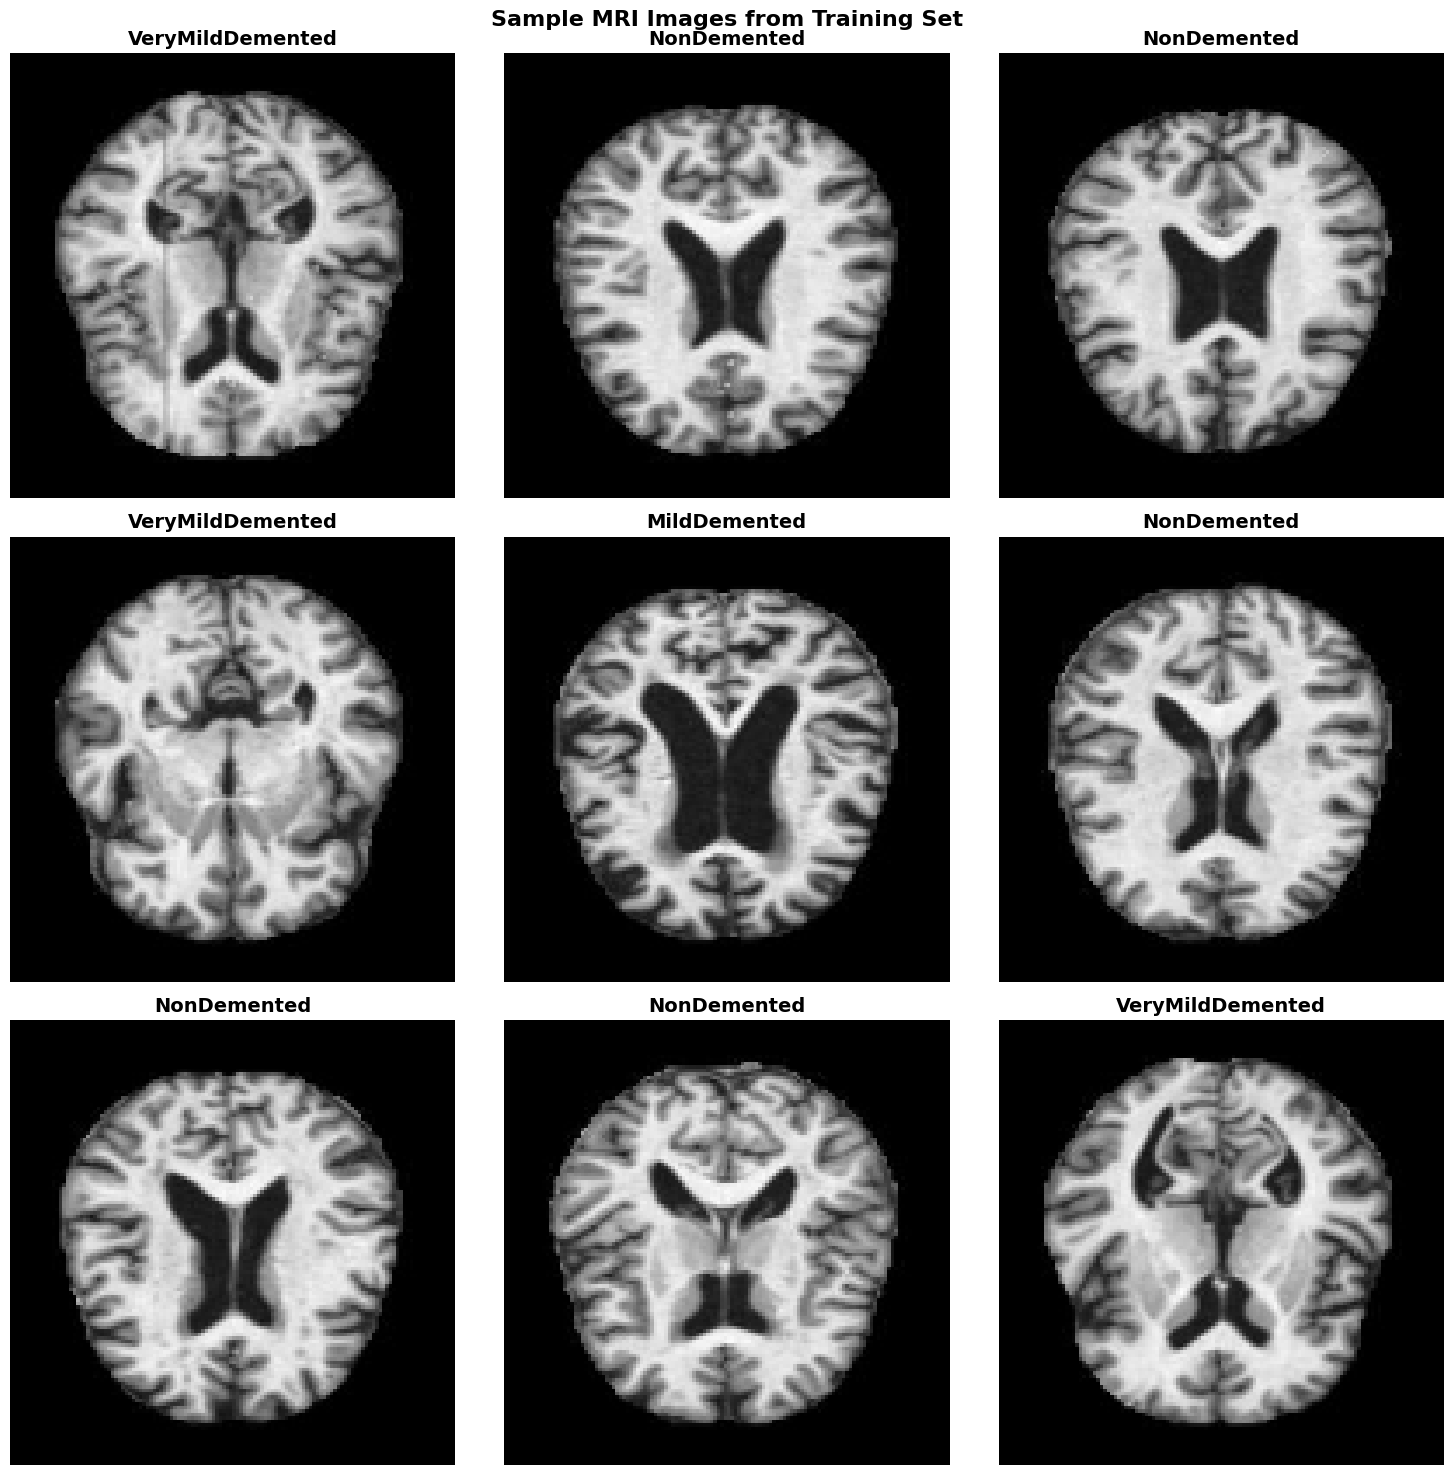

✓ Sample images displayed!




In [16]:
print("=" * 80)
print("STEP 7: VISUALIZING SAMPLE IMAGES")
print("=" * 80)
print("\nDisplaying 9 sample images from training set...\n")

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])], fontsize=14, fontweight='bold')
        plt.axis("off")
plt.suptitle('Sample MRI Images from Training Set', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("✓ Sample images displayed!")
print("\n" + "=" * 80 + "\n")

STEP 8: ANALYZING CLASS DISTRIBUTION

Counting images in each class...

Training set distribution:
  MildDemented: 705 images (13.8%)
  ModerateDemented: 51 images (1.0%)
  NonDemented: 2560 images (50.1%)
  VeryMildDemented: 1792 images (35.1%)


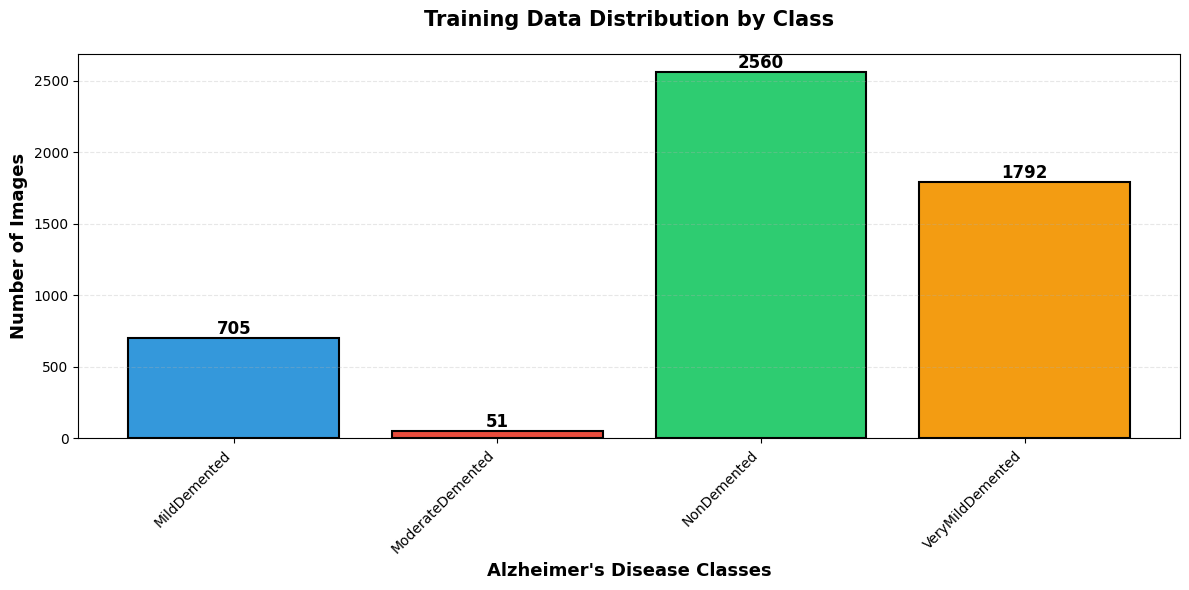


✓ Class distribution plotted!




In [17]:
print("=" * 80)
print("STEP 8: ANALYZING CLASS DISTRIBUTION")
print("=" * 80)

# Count images in each class for training set
print("\nCounting images in each class...")
class_counts = {}
for class_name in class_names:
    class_path = f"./output/train/{class_name}"
    class_counts[class_name] = len(os.listdir(class_path))

print("\nTraining set distribution:")
for class_name, count in class_counts.items():
    percentage = (count / sum(class_counts.values())) * 100
    print(f"  {class_name}: {count} images ({percentage:.1f}%)")

# Plot distribution
plt.figure(figsize=(12, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
bars = plt.bar(class_names, list(class_counts.values()), color=colors, edgecolor='black', linewidth=1.5)

plt.xlabel('Alzheimer\'s Disease Classes', fontsize=13, fontweight='bold')
plt.ylabel('Number of Images', fontsize=13, fontweight='bold')
plt.title('Training Data Distribution by Class', fontsize=15, fontweight='bold', pad=20)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("\n✓ Class distribution plotted!")
print("\n" + "=" * 80 + "\n")


In [18]:
print("=" * 80)
print("STEP 9: BUILDING CNN MODEL")
print("=" * 80)
print("\nCreating Convolutional Neural Network architecture...")
print("Architecture: 3 Conv blocks + 3 Dense layers")

model = keras.models.Sequential([
    # Input layer with rescaling (normalize pixel values to 0-1)
    keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    
    # First Convolutional Block
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', 
                        activation='relu', kernel_initializer="he_normal"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    # Second Convolutional Block
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', 
                        activation='relu', kernel_initializer="he_normal"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    
    # Third Convolutional Block
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', 
                        activation='relu', kernel_initializer="he_normal"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    
    # Flatten and Dense Layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(4, activation="softmax")  # 4 classes output
])

print("\n" + "-" * 80)
model.summary()
print("-" * 80)

print("\n✓ Model architecture created successfully!")
print(f"  Total parameters: {model.count_params():,}")
print("\n" + "=" * 80 + "\n")

STEP 9: BUILDING CNN MODEL

Creating Convolutional Neural Network architecture...
Architecture: 3 Conv blocks + 3 Dense layers

--------------------------------------------------------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,125,124 (8.11 MB)

 Trainable params: 2,125,124 (8.11 MB)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------------------------------------

✓ Model architecture created successfully!
  Total parameters: 2,125,124




In [19]:
print("=" * 80)
print("STEP 10: COMPILING MODEL")
print("=" * 80)

print("\nCompiling model with:")
print("  - Loss function: Categorical Cross-entropy")
print("  - Optimizer: Adam")
print("  - Metrics: Accuracy, AUC, Precision, Recall")

model.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

print("\n✓ Model compiled successfully!")
print("\n" + "=" * 80 + "\n")

STEP 10: COMPILING MODEL

Compiling model with:
  - Loss function: Categorical Cross-entropy
  - Optimizer: Adam
  - Metrics: Accuracy, AUC, Precision, Recall

✓ Model compiled successfully!




In [21]:
print("=" * 80)
print("STEP 11: CONFIGURING TRAINING CALLBACKS")
print("=" * 80)

print("\nSetting up callbacks:")
print("  1. Early Stopping: Stops training if no improvement for 10 epochs")
print("  2. Model Checkpoint: Saves best model based on validation accuracy")

# File path to save best model (using .keras format)
filepath = './cnn_best_weights.keras'

# Early stopping callback
earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

# Model checkpoint callback
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

callbacks_list = [earlystopping, checkpoint]

print("\n✓ Callbacks configured successfully!")
print("\n" + "=" * 80 + "\n")

STEP 11: CONFIGURING TRAINING CALLBACKS

Setting up callbacks:
  1. Early Stopping: Stops training if no improvement for 10 epochs
  2. Model Checkpoint: Saves best model based on validation accuracy

✓ Callbacks configured successfully!




In [44]:

print("=" * 80)
print("REBUILDING MODEL FROM SCRATCH")
print("=" * 80)

from tensorflow import keras
import tensorflow as tf

IMG_HEIGHT = 128
IMG_WIDTH = 128

# Build fresh model
model = keras.models.Sequential([
    # Input layer with rescaling
    keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    
    # First Convolutional Block
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', 
                        activation='relu', kernel_initializer="he_normal"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    # Second Convolutional Block
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', 
                        activation='relu', kernel_initializer="he_normal"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    
    # Third Convolutional Block
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', 
                        activation='relu', kernel_initializer="he_normal"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    
    # Dense Layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(4, activation="softmax")
])

# Compile
model.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

print("✓ New model built and compiled!")
model.summary()

REBUILDING MODEL FROM SCRATCH
✓ New model built and compiled!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,125,124 (8.11 MB)

 Trainable params: 2,125,124 (8.11 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Setup callbacks
filepath = './cnn_best_weights_v2.keras'

earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

callbacks_list = [earlystopping, checkpoint]

print("Starting retraining...")
print("=" * 80)

# Retrain
hist = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    batch_size=64,
    verbose=1,
    callbacks=callbacks_list
)

print("\n✓ Retraining completed!")

Starting retraining...
Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4623 - auc: 0.7331 - loss: 1.5131 - precision: 0.4937 - recall: 0.3519
Epoch 1: val_accuracy improved from -inf to 0.53448, saving model to ./cnn_best_weights_v2.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.4627 - auc: 0.7337 - loss: 1.5087 - precision: 0.4946 - recall: 0.3518 - val_accuracy: 0.5345 - val_auc: 0.8305 - val_loss: 0.9940 - val_precision: 0.7396 - val_recall: 0.3072
Epoch 2/50
77/80 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5492 - auc: 0.8331 - loss: 0.9391 - precision: 0.6490 - recall: 0.3800
Epoch 2: val_accuracy improved from 0.53448 to 0.59404, saving model to ./cnn_best_weights_v2.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5501 - auc: 0.8336 - loss: 0.9379 - precision: 0.6498 - recall: 0.3809 - val_accuracy: 0.5940 - val_auc: 0.8571 - val_loss: 0.8858 - val_precision: 0.7319 - val_recall: 0.4279
Epoch 3/50
77/80 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/s

STEP 14: VISUALIZING TRAINING HISTORY

Generating performance plots...



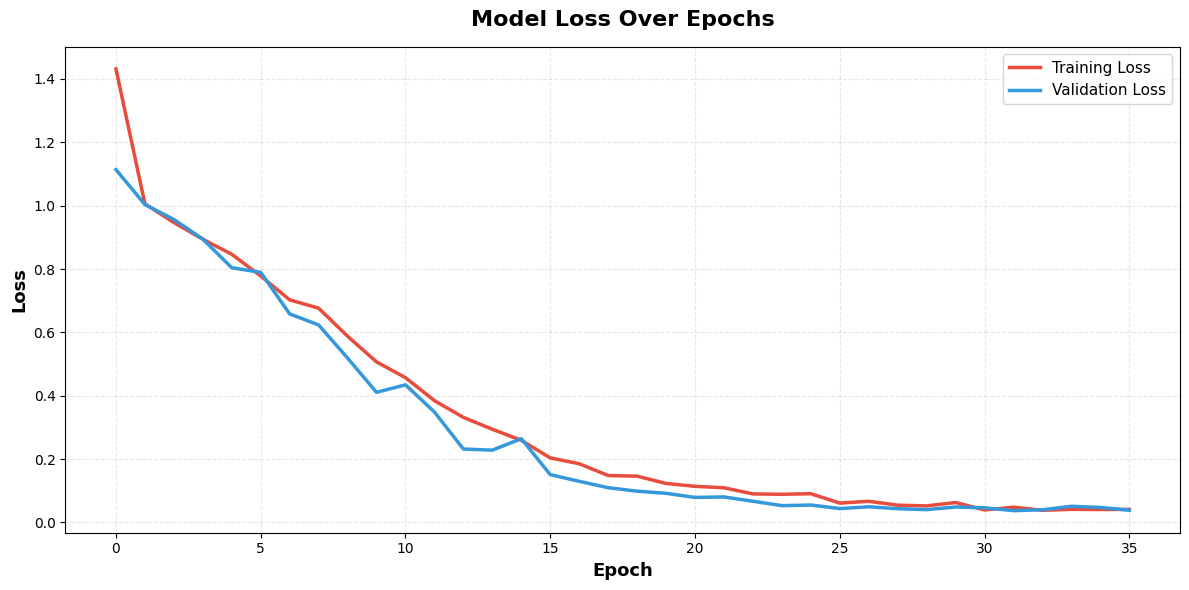

In [24]:
print("=" * 80)
print("STEP 14: VISUALIZING TRAINING HISTORY")
print("=" * 80)
print("\nGenerating performance plots...\n")

# Loss plot
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Training Loss', linewidth=2.5, color='#e74c3c')
plt.plot(hist.history['val_loss'], label='Validation Loss', linewidth=2.5, color='#3498db')
plt.title('Model Loss Over Epochs', fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Loss', fontsize=13, fontweight='bold')
plt.xlabel('Epoch', fontsize=13, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


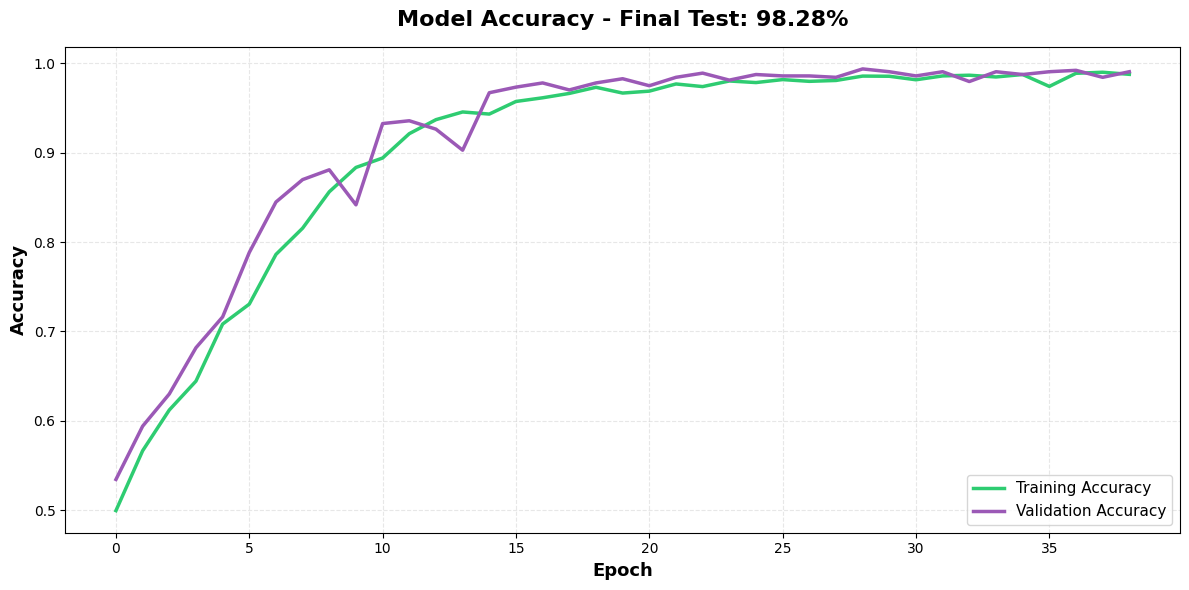

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(hist.history['accuracy'], label='Training Accuracy', linewidth=2.5, color='#2ecc71')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5, color='#9b59b6')
plt.title(f'Model Accuracy - Final Test: {test_accuracy*100:.2f}%', 
          fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Accuracy', fontsize=13, fontweight='bold')
plt.xlabel('Epoch', fontsize=13, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

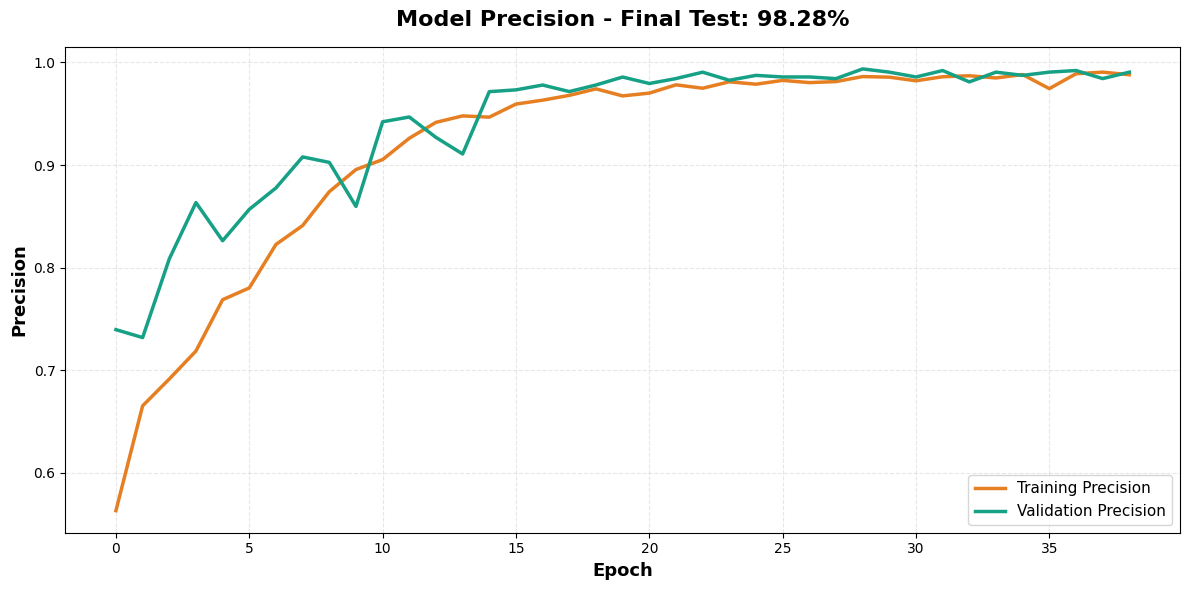

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(hist.history['precision'], label='Training Precision', linewidth=2.5, color='#e67e22')
plt.plot(hist.history['val_precision'], label='Validation Precision', linewidth=2.5, color='#16a085')
plt.title(f'Model Precision - Final Test: {test_precision*100:.2f}%', 
          fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Precision', fontsize=13, fontweight='bold')
plt.xlabel('Epoch', fontsize=13, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

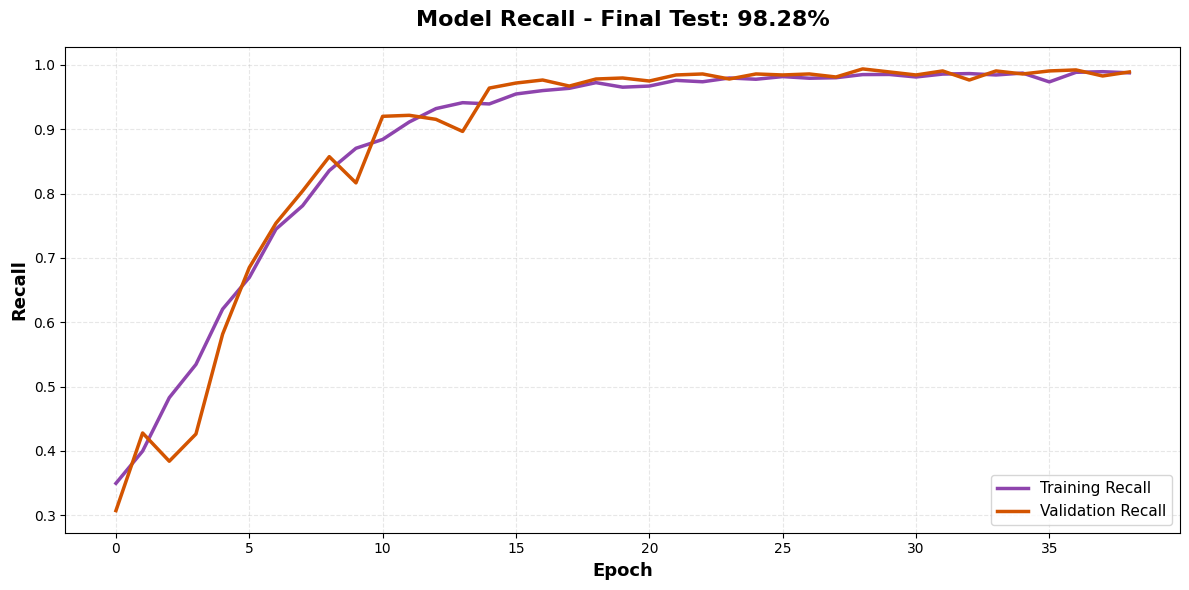

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(hist.history['recall'], label='Training Recall', linewidth=2.5, color='#8e44ad')
plt.plot(hist.history['val_recall'], label='Validation Recall', linewidth=2.5, color='#d35400')
plt.title(f'Model Recall - Final Test: {test_recall*100:.2f}%', 
          fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Recall', fontsize=13, fontweight='bold')
plt.xlabel('Epoch', fontsize=13, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [54]:
print("=" * 80)
print("STEP 19: GENERATING PREDICTIONS")
print("=" * 80)
print("\nGenerating predictions on test set for confusion matrix...")

y_pred = []  # Store predicted labels
y_true = []  # Store true labels

# Iterate over the test dataset
print("Processing test batches...")
for i, (image_batch, label_batch) in enumerate(test_ds):
    # Append true labels
    y_true.append(label_batch)
    # Compute predictions
    preds = model.predict(image_batch, verbose=0)
    # Append predicted labels
    y_pred.append(np.argmax(preds, axis=1))
    
    if (i + 1) % 5 == 0:
        print(f"  Processed {i + 1} batches...")

# Convert the true and predicted labels into arrays
correct_labels = tf.concat([item for item in y_true], axis=0)
predicted_labels = tf.concat([item for item in y_pred], axis=0)
correct_labels = np.argmax(correct_labels, axis=1)

print("\n✓ Predictions generated successfully!")
print(f"  Total test samples: {len(correct_labels)}")
print("\n" + "=" * 80 + "\n")

STEP 19: GENERATING PREDICTIONS

Generating predictions on test set for confusion matrix...
Processing test batches...
  Processed 5 batches...
  Processed 10 batches...

✓ Predictions generated successfully!
  Total test samples: 640




STEP 20: GENERATING CONFUSION MATRIX

Per-class accuracy:
  MildDemented: 97.75%
  ModerateDemented: 100.00%
  NonDemented: 99.69%
  VeryMildDemented: 98.66%


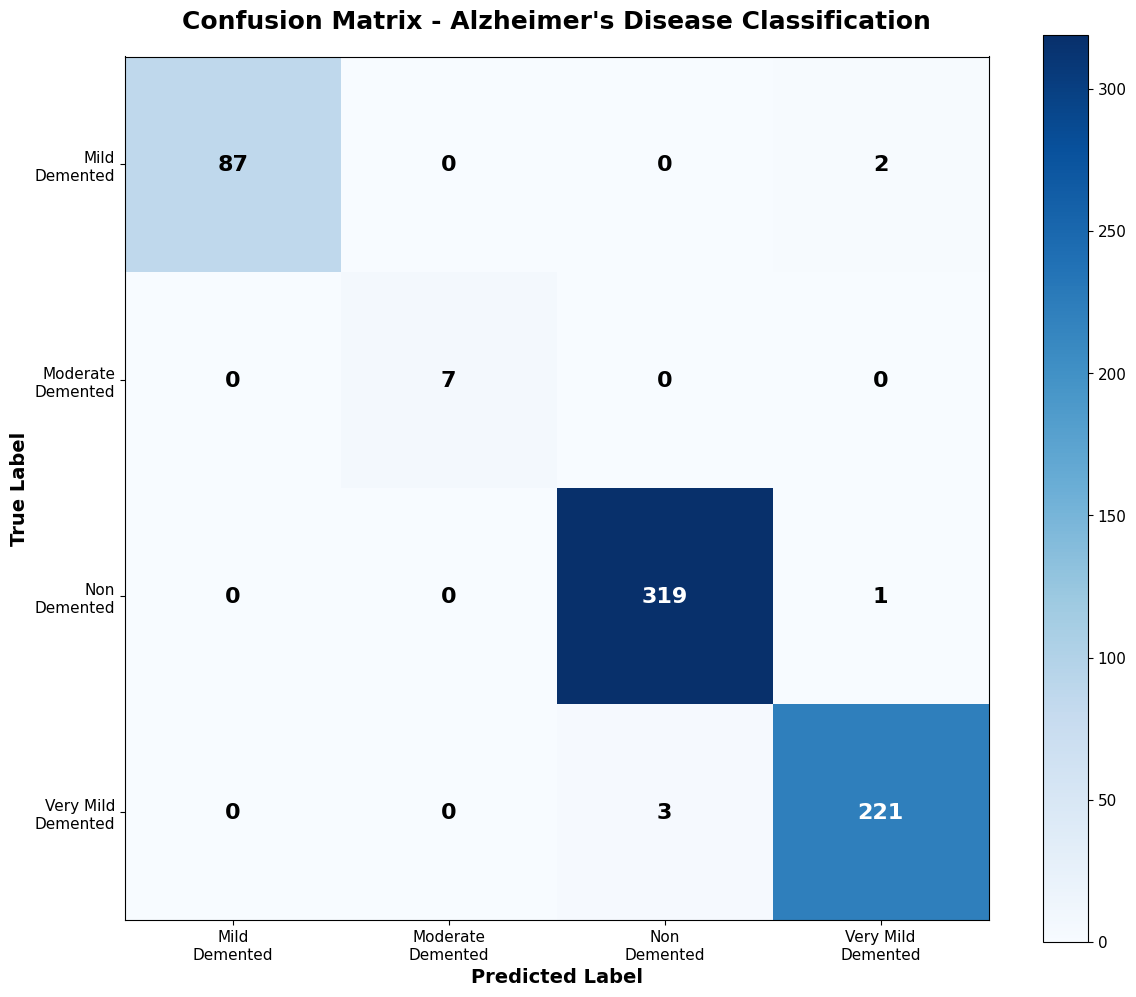


✓ Confusion matrix generated!




In [55]:
print("=" * 80)
print("STEP 20: GENERATING CONFUSION MATRIX")
print("=" * 80)

# Compute confusion matrix
confusion_mtx = confusion_matrix(correct_labels, predicted_labels)

# Define shorter class labels for better visualization
class_labels_short = ['Mild\nDemented', 'Moderate\nDemented', 'Non\nDemented', 'Very Mild\nDemented']

# Calculate accuracy for each class
print("\nPer-class accuracy:")
for i, class_name in enumerate(class_names):
    class_accuracy = confusion_mtx[i, i] / confusion_mtx[i, :].sum()
    print(f"  {class_name}: {class_accuracy*100:.2f}%")

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Alzheimer\'s Disease Classification', 
          fontsize=18, fontweight='bold', pad=20)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=11)

tick_marks = np.arange(len(class_labels_short))
plt.xticks(tick_marks, class_labels_short, rotation=0, ha='center', fontsize=11)
plt.yticks(tick_marks, class_labels_short, fontsize=11)

# Add text annotations
fmt = 'd'
thresh = confusion_mtx.max() / 2.
for i, j in product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, format(confusion_mtx[i, j], fmt),
             horizontalalignment="center",
             verticalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black",
             fontsize=16, fontweight='bold')

plt.tight_layout()
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.show()

print("\n✓ Confusion matrix generated!")
print("\n" + "=" * 80 + "\n")


In [56]:
print("=" * 80)
print("STEP 21: DETAILED CLASSIFICATION REPORT")
print("=" * 80)
print("\n")
print(classification_report(correct_labels, predicted_labels, 
                          target_names=class_names, digits=4))
print("=" * 80 + "\n")

STEP 21: DETAILED CLASSIFICATION REPORT


                  precision    recall  f1-score   support

    MildDemented     1.0000    0.9775    0.9886        89
ModerateDemented     1.0000    1.0000    1.0000         7
     NonDemented     0.9907    0.9969    0.9938       320
VeryMildDemented     0.9866    0.9866    0.9866       224

        accuracy                         0.9906       640
       macro avg     0.9943    0.9903    0.9923       640
    weighted avg     0.9907    0.9906    0.9906       640




In [57]:
print("=" * 80)
print("STEP 22: ADDITIONAL PERFORMANCE METRICS")
print("=" * 80)

from sklearn.metrics import cohen_kappa_score, matthews_corrcoef

# Overall accuracy
overall_accuracy = accuracy_score(correct_labels, predicted_labels)
print(f"\n  Overall Accuracy: {overall_accuracy*100:.2f}%")

# Cohen's Kappa Score (measures agreement beyond chance)
kappa = cohen_kappa_score(correct_labels, predicted_labels)
print(f"  Cohen's Kappa Score: {kappa:.4f}")

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(correct_labels, predicted_labels)
print(f"  Matthews Correlation Coefficient: {mcc:.4f}")

# Calculate misclassification rate
misclassification_rate = 1 - overall_accuracy
print(f"  Misclassification Rate: {misclassification_rate*100:.2f}%")

print("\n" + "=" * 80 + "\n")

STEP 22: ADDITIONAL PERFORMANCE METRICS

  Overall Accuracy: 99.06%
  Cohen's Kappa Score: 0.9846
  Matthews Correlation Coefficient: 0.9846
  Misclassification Rate: 0.94%




In [58]:
print("=" * 80)
print("STEP 23: SAVING TRAINED MODEL")
print("=" * 80)

print("\nSaving model in multiple formats...")

# Save in Keras format (recommended for newer versions)
model.save('alzheimers_cnn_model.keras')
print("  ✓ Saved as: alzheimers_cnn_model.keras (Keras native format - RECOMMENDED)")

# Save in H5 format (for backward compatibility)
try:
    model.save('alzheimers_cnn_model.h5')
    print("  ✓ Saved as: alzheimers_cnn_model.h5 (H5 format - legacy)")
except Exception as e:
    print(f"  ⚠ H5 format save skipped: {str(e)}")

# Export in SavedModel format (for TensorFlow deployment/serving)
try:
    model.export('alzheimers_cnn_model_savedformat')
    print("  ✓ Exported as: alzheimers_cnn_model_savedformat/ (TensorFlow SavedModel)")
except Exception as e:
    print(f"  ⚠ SavedModel export skipped: {str(e)}")

print("\n✓ Model saved successfully!")
print("\nYou can download these files from the output section.")
print("\n" + "=" * 80 + "\n")

STEP 23: SAVING TRAINED MODEL

Saving model in multiple formats...
  ✓ Saved as: alzheimers_cnn_model.keras (Keras native format - RECOMMENDED)
  ✓ Saved as: alzheimers_cnn_model.h5 (H5 format - legacy)
INFO:tensorflow:Assets written to: alzheimers_cnn_model_savedformat/assets


INFO:tensorflow:Assets written to: alzheimers_cnn_model_savedformat/assets


Saved artifact at 'alzheimers_cnn_model_savedformat'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor_105')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  137538414115728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137538414112080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137538414115920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137538414363856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137538414362704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137538414364048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137538414364432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137538414364816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137538414363088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137538414366352: TensorSpec(shape=(), dtype=tf.resource, name=No

In [41]:
print("=" * 80)
print("RELOADING BEST MODEL FOR TESTING")
print("=" * 80)
print("\nReloading the best model saved during training...")

# Reload the best model from checkpoint
model = keras.models.load_model('cnn_best_weights.keras')

print("✓ Best model reloaded successfully!")
print("This model achieved the highest validation accuracy during training.")
print("\n" + "=" * 80 + "\n")

RELOADING BEST MODEL FOR TESTING

Reloading the best model saved during training...
✓ Best model reloaded successfully!
This model achieved the highest validation accuracy during training.




In [59]:
print("=" * 80)
print("BONUS: TESTING PREDICTIONS ON MULTIPLE SAMPLE IMAGES")
print("=" * 80)
print("\nLet's test the model on 5 random images from the test set...\n")

# Test on 5 random images
import random
from PIL import Image

num_tests = 5
correct_predictions = 0

for test_num in range(num_tests):
    print(f"\n{'='*80}")
    print(f"TEST {test_num + 1}/{num_tests}")
    print(f"{'='*80}")
    
    # Get a random class
    random_class = random.choice(class_names)
    class_path = f'./output/test/{random_class}'
    
    # Get a random image from that class
    if os.path.exists(class_path):
        image_files = [f for f in os.listdir(class_path) 
                       if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
        
        if len(image_files) > 0:
            random_image = random.choice(image_files)
            test_image_path = os.path.join(class_path, random_image)
            
            print(f"Image: {random_image}")
            print(f"True Class: {random_class}")
            print("-" * 80)
            
            # Load and preprocess the image
            img = Image.open(test_image_path)
            
            # Convert to RGB (in case it's grayscale)
            if img.mode != 'RGB':
                img = img.convert('RGB')
            
            # Resize to match model input
            img_resized = img.resize((IMG_WIDTH, IMG_HEIGHT))
            
            # Convert to numpy array
            img_array = np.array(img_resized)
            
            # IMPORTANT: Keep values in 0-255 range!
            # The model's Rescaling layer will handle normalization
            img_array = img_array.astype('float32')  # DO NOT divide by 255!
            
            # Add batch dimension
            img_array = np.expand_dims(img_array, axis=0)
            
            # Make prediction
            predictions = model.predict(img_array, verbose=0)
            predicted_index = np.argmax(predictions[0])
            predicted_class = class_names[predicted_index]
            confidence = predictions[0][predicted_index] * 100
            
            is_correct = predicted_class == random_class
            if is_correct:
                correct_predictions += 1
            
            # Display results
            print(f"\n📊 PREDICTION:")
            print(f"  Predicted: {predicted_class} ({confidence:.2f}%)")
            print(f"  Result: {'✓ CORRECT' if is_correct else '✗ INCORRECT'}")
            
            # Show all probabilities
            print(f"\n📈 PROBABILITIES:")
            for i, class_name in enumerate(class_names):
                prob = predictions[0][i] * 100
                bar = '█' * int(prob / 2)
                marker = ' ← TRUE' if class_name == random_class else ''
                marker += ' ← PREDICTED' if class_name == predicted_class else ''
                print(f"  {class_name:20s}: {prob:6.2f}% {bar}{marker}")


BONUS: TESTING PREDICTIONS ON MULTIPLE SAMPLE IMAGES

Let's test the model on 5 random images from the test set...


TEST 1/5
Image: 22 (17).jpg
True Class: VeryMildDemented
--------------------------------------------------------------------------------

📊 PREDICTION:
  Predicted: VeryMildDemented (100.00%)
  Result: ✓ CORRECT

📈 PROBABILITIES:
  MildDemented        :   0.00% 
  ModerateDemented    :   0.00% 
  NonDemented         :   0.00% 
  VeryMildDemented    : 100.00% █████████████████████████████████████████████████ ← TRUE ← PREDICTED

TEST 2/5
Image: 28 (46).jpg
True Class: VeryMildDemented
--------------------------------------------------------------------------------

📊 PREDICTION:
  Predicted: VeryMildDemented (98.98%)
  Result: ✓ CORRECT

📈 PROBABILITIES:
  MildDemented        :   0.36% 
  ModerateDemented    :   0.07% 
  NonDemented         :   0.59% 
  VeryMildDemented    :  98.98% █████████████████████████████████████████████████ ← TRUE ← PREDICTED

TEST 3/5
Image: 29 (